In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [2]:
audit_risk = pd.read_csv("audit_risk.csv")
audit_risk = audit_risk.sample(frac=1).reset_index(drop=True)

In [3]:
X = np.array(audit_risk)[:,:-1]
X

array([[ 3.89, 12.  ,  0.  , ...,  0.  ,  2.  ,  2.  ],
       [ 3.89, 37.  ,  2.4 , ...,  0.  ,  2.  ,  3.6 ],
       [ 3.89,  5.  ,  0.  , ...,  0.  ,  2.  ,  2.  ],
       ...,
       [ 3.89, 19.  ,  1.32, ...,  0.  ,  2.  ,  2.2 ],
       [ 3.89,  8.  ,  3.98, ...,  0.  ,  2.  ,  2.4 ],
       [ 3.89, 11.  ,  0.  , ...,  0.  ,  2.  ,  2.  ]])

In [4]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder(sparse=False)

Y = audit_risk.Risk
Y = one_hot_encoder.fit_transform(np.array(Y).reshape(-1, 1))
Y[:5]

array([[1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)

In [6]:
def NeuralNetwork(X_train, Y_train, X_val=None, Y_val=None, epochs=10, nodes=[], lr=0.15):
    hidden_layers = len(nodes) - 1
    weights = InitializeWeights(nodes)

    for epoch in range(1, epochs+1):
        weights = Train(X_train, Y_train, lr, weights)

        if(epoch % 20 == 0):
            print("Epoch {}".format(epoch))
            print("Training Accuracy:{}".format(Accuracy(X_train, Y_train, weights)))
            if X_val.any():
                print("Validation Accuracy:{}".format(Accuracy(X_val, Y_val, weights)))
            
    return weights

In [7]:
def InitializeWeights(nodes):
    layers, weights = len(nodes), []
    
    for i in range(1, layers):
        w = [[np.random.uniform(-1, 1) for k in range(nodes[i-1] + 1)]
              for j in range(nodes[i])]
        weights.append(np.matrix(w))
    
    return weights

In [8]:
def ForwardPropagation(x, weights, layers):
    activations, layer_input = [x], x
    for j in range(layers):
        activation = Sigmoid(np.dot(layer_input, weights[j].T))
        activations.append(activation)
        layer_input = np.append(1, activation) # Augment with bias
    
    return activations

In [9]:
def BackPropagation(y, activations, weights, layers):
    outputFinal = activations[-1]
    error = np.matrix(y - outputFinal)
    
    for j in range(layers, 0, -1):
        currActivation = activations[j]
        
        if(j > 1):
            prevActivation = np.append(1, activations[j-1])
        else:
            prevActivation = activations[0]
        
        delta = np.multiply(error, SigmoidDerivative(currActivation))
        weights[j-1] += lr * np.multiply(delta.T, prevActivation)

        w = np.delete(weights[j-1], [0], axis=1)
        error = np.dot(delta, w)
    
    return weights

In [10]:
def Train(X, Y, lr, weights):
    layers = len(weights)
    for i in range(len(X)):
        x, y = X[i], Y[i]
        x = np.matrix(np.append(1, x)) # Augment feature vector
        
        activations = ForwardPropagation(x, weights, layers)
        weights = BackPropagation(y, activations, weights, layers)   

    return weights

In [11]:
def Sigmoid(x):
    return 1 / (1 + np.exp(-x))

def SigmoidDerivative(x):
    return np.multiply(x, 1-x)

In [12]:
def Predict(item, weights):
    layers = len(weights)
    item = np.append(1, item)

    activations = ForwardPropagation(item, weights, layers)
    
    outputFinal = activations[-1].A1
    index = FindMaxActivation(outputFinal)

    y = [0 for i in range(len(outputFinal))]
    y[index] = 1
    return y


def FindMaxActivation(output):
    m, index = output[0], 0
    for i in range(1, len(output)):
        if(output[i] > m):
            m, index = output[i], i
    
    return index

In [13]:
def Accuracy(X, Y, weights, display=False):
    correct = 0

    for i in range(len(X)):
        x, y = X[i], list(Y[i])
        guess = Predict(x, weights)
        if display == True:
            print("\n\nInput:\n",x,"\nPredicted:\n",guess,"\nActual:\n",y)
        if(y == guess):
            correct += 1
        elif display == True:
            print("mispredicted")

    return correct / len(X)

In [14]:
f = len(X[0])
o = len(Y[0])

layers = [f, 5, 10, o]
lr, epochs = 0.15, 100

weights = NeuralNetwork(X_train, Y_train, X_val, Y_val, epochs=epochs, nodes=layers, lr=lr);
print("Final weights:\n",weights)

Epoch 20
Training Accuracy:0.9210526315789473
Validation Accuracy:0.7777777777777778
Epoch 40
Training Accuracy:0.9210526315789473
Validation Accuracy:0.7777777777777778
Epoch 60
Training Accuracy:0.8947368421052632
Validation Accuracy:0.8888888888888888
Epoch 80
Training Accuracy:0.9078947368421053
Validation Accuracy:0.7777777777777778
Epoch 100
Training Accuracy:0.9736842105263158
Validation Accuracy:0.7777777777777778
Final weights:
 [matrix([[ 0.90008318,  0.99389123,  0.8938117 , -0.09512261, -0.77479806,
         -0.74048295, -0.16501046, -0.39473867,  0.66029239, -0.56298664,
          0.62883636, -0.99165375, -0.74190511,  0.46731325, -0.02121829,
         -0.67902422, -0.46472677,  0.55567702],
        [-0.02332138,  0.12820737,  1.03917046, -0.67259859, -0.62141953,
          0.18132776,  0.48998548, -1.87976525, -0.17092305,  0.77345164,
          0.72893399, -0.23792755,  1.13425315,  0.25686918,  1.08061822,
          0.29986398, -0.56580707, -0.00469891],
        [-1.010

In [15]:
print("Testing Accuracy: {}".format(Accuracy(X_test, Y_test, weights, display = True)))



Input:
 [ 3.89 11.    0.    2.    6.8   4.    6.8   5.    2.   47.9   6.    2.
  0.    2.    0.    2.    3.  ] 
Predicted:
 [0, 1] 
Actual:
 [0.0, 1.0]


Input:
 [3.89 6.   0.   2.   0.83 2.   0.83 5.   2.   2.95 2.   2.   0.   2.
 0.   2.   2.  ] 
Predicted:
 [1, 0] 
Actual:
 [1.0, 0.0]


Input:
 [ 3.89 16.    1.19  4.   12.88  6.   14.07  5.    2.    2.33  2.    6.
  0.    2.    0.    2.    3.8 ] 
Predicted:
 [0, 1] 
Actual:
 [0.0, 1.0]


Input:
 [ 3.89 31.    1.99  4.   10.24  6.   12.23  5.    2.   20.78  6.    2.
  0.    2.    0.    2.    3.8 ] 
Predicted:
 [0, 1] 
Actual:
 [0.0, 1.0]


Input:
 [ 3.89 37.    2.4   6.   16.63  6.   19.03  5.    2.    1.16  2.    2.
  0.    2.    0.    2.    3.6 ] 
Predicted:
 [0, 1] 
Actual:
 [0.0, 1.0]


Input:
 [3.89 3.   0.94 2.   0.01 2.   0.95 5.   2.   0.1  2.   2.   0.   2.
 0.   2.   2.  ] 
Predicted:
 [1, 0] 
Actual:
 [1.0, 0.0]


Input:
 [ 3.89 22.    0.    2.   18.05  6.   18.05  5.    2.    2.29  2.    2.
  0.    2.    0.    2.    3.2

In [16]:
Y_result = []
Converted = []
Actual = []
Prediction = []
for x in X_test:
    guess = Predict(x,weights)
    Y_result.append(guess)
    for i in range(len(guess)):
        if guess[i] ==1:
            Converted.append(i)
for i in range(len(Y_test)):
    for j in range(len(Y_test[0])):
        if Y_test[i][j] ==1:
            Actual.append(j)
            
print("R2 Score: %f" % r2_score(Y_test,Y_result))
print("\nClassification Report:\n")
print(classification_report(Y_test,Y_result))
print("\nConfusion Matrix:\n")
print(confusion_matrix(Actual, Converted))

R2 Score: 0.700000

Classification Report:

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       0.91      1.00      0.95        10

   micro avg       0.93      0.93      0.93        15
   macro avg       0.95      0.90      0.92        15
weighted avg       0.94      0.93      0.93        15
 samples avg       0.93      0.93      0.93        15


Confusion Matrix:

[[ 4  1]
 [ 0 10]]


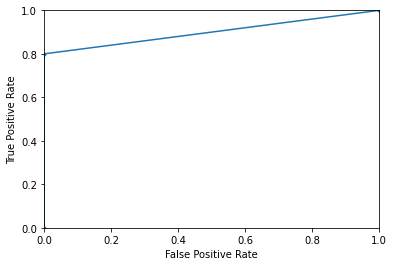

In [17]:
ytest, yresult = [], []
for i in range(len(Y_test)):
    ytest.append(Y_test[i][0])
    yresult.append(Y_result[i][0])
    
fpr, tpr, thresholds = roc_curve(ytest, yresult)

def plot_roc_curve(fpr,tpr):
    plt.plot(fpr, tpr, marker='.')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()
plot_roc_curve(fpr,tpr)